In [1]:
import pandas as pd

train = pd.read_csv("data/train.zip", index_col=['id'])
test = pd.read_csv("data/test.zip", index_col=['id'])

print(train.shape, test.shape)
print(set(train.columns) - set(test.columns))

(19579, 2) (8392, 1)
{'author'}


In [2]:
train.head()

,text,author
id,,
id26305,"This process, however, afforded me no means of...",EAP
id17569,It never once occurred to me that the fumbling...,HPL
id11008,"In his left hand was a gold snuff box, from wh...",EAP
id27763,How lovely is spring As we looked from Windsor...,MWS
id12958,"Finding nothing else, not even gold, the Super...",HPL


In [3]:
====++

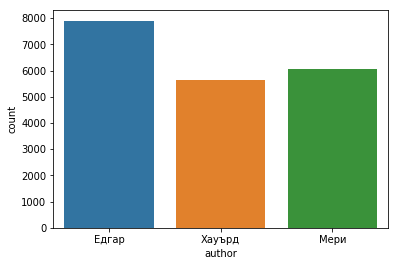

In [4]:
sns.countplot(data=train, x='author')

In [6]:
all_words = train['text'].str.split(expand=True).unstack().value_counts()
print("Most used words")
all_words.head(15)

Most used words


the     33296
of      20851
and     17059
to      12615
I       10382
a       10359
in       8787
was      6440
that     5988
my       5037
had      4324
with     4207
his      3802
as       3528
he       3422
dtype: int64

In [9]:
print("Least used words: ")
all_words.tail(15)


Least used words: 


disenfranchised    1
precipices;        1
symmetries         1
resolution,        1
affrays            1
originality,       1
Magazines          1
decide:            1
preserve.          1
slxw;              1
Hopkins            1
sections           1
"art               1
cracking,          1
L's                1
dtype: int64

In [10]:
eap = train[train.author=="Едгар"].text.values
hpl = train[train.author=="Хауърд"].text.values
mws = train[train.author=="Мери"].text.values

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score

In [94]:
f

array([ 0.78783701,  0.79635305,  0.79509579])

In [95]:
pipeline.fit(train.text, train.author)
count_vectorizer = pipeline.steps[0][1]
count_vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [96]:
list(count_vectorizer.vocabulary_.items())[:15]

[('particulars', 15803),
 ('orange', 15305),
 ('soundless', 20539),
 ('reconsider', 17998),
 ('industry', 11459),
 ('avatar', 1606),
 ('squares', 20788),
 ('real', 17869),
 ('frequented', 9155),
 ('derelict', 5823),
 ('forget', 8998),
 ('definiteness', 5606),
 ('hysterical', 10922),
 ('sorts', 20522),
 ('obligations', 15028)]

In [97]:
from sklearn.model_selection import cross_val_predict
prediction = cross_val_predict(pipeline, train.text, train.author, cv=3, n_jobs=3)
prediction

array(['Едгар', 'Едгар', 'Хауърд', ..., 'Едгар', 'Едгар', 'Хауърд'], dtype=object)

0.793094642219


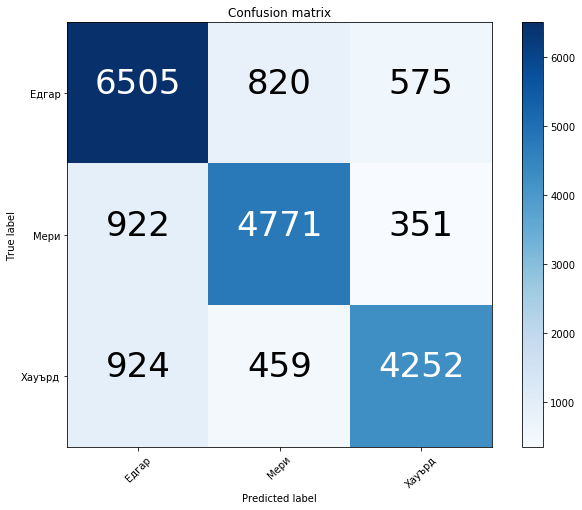

In [98]:
import itertools
from sklearn.metrics import confusion_matrix, accuracy_score

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,
                          figsize=(9, 7)):
    matrix = confusion_matrix(y_true, y_pred)

    if normalize:
        matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=figsize)
    plt.imshow(matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = matrix.max() / 2.
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, format(matrix[i, j], fmt),
                 horizontalalignment="center",
                 size=int((figsize[0] / 10) * 38),
                 color="white" if matrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
authors = pipeline.classes_
print(accuracy_score(train.author, prediction))
plot_confusion_matrix(train.author, prediction, classes=authors)

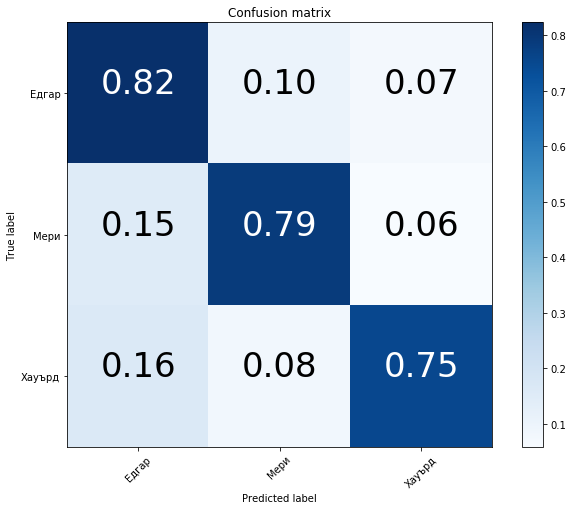

In [57]:
plot_confusion_matrix(train.author, prediction, classes=authors, normalize=True)

In [58]:
from sklearn.ensemble import RandomForestClassifier
pipeline = Pipeline([
    ('features', CountVectorizer()),
    ('clf', RandomForestClassifier())
])

cross_val_score(pipeline, train.text, train.author, cv=3, n_jobs=3)

array([ 0.59788603,  0.60680356,  0.61256705])

In [59]:
cross_val_score(pipeline, train.text, train.author, 
                cv=3, n_jobs=3, scoring='neg_log_loss')

array([-1.48202633, -1.51582597, -1.4146401 ])

In [77]:
import string

explore = train.copy()
explore['words'] = explore.text.apply(lambda x: len(str(x).split()))
explore['unique_words'] = explore.text.apply(lambda s: len(set(str(s).split())))
explore['symbols'] = explore.text.str.len()
explore['unique_symbols'] = explore.text.apply(lambda s: len(set(str(s))))

# бр. главни букви
explore['capital_letters'] = explore.text.apply(lambda s: sum([str.isupper(c) for c in str(s)]))

# бр. на думи съдържащи само главни буква
explore['only_capital_letter_words'] = explore.text.apply(lambda s: sum([str.isupper(w) for w in str(s).split()]))

# средна дължина на дума
explore['average_word_lenght'] = explore.text.apply(lambda s: np.mean([len(w) for w in str(s).split()]))

# бр. на препинателни знаци
train["punctuation"] = train.text.apply(lambda s: sum([c in string.punctuation for c in str(s)]) )

explore[:10]


,text,author,punctuation,words,unique_words,symbols,unique_symbols,capital_letters,only_capital_letter_words,average_word_lenght
id,,,,,,,,,,
id26305,"This process, however, afforded me no means of...",Едгар,7,41,35,231,28,3,2,4.658537
id17569,It never once occurred to me that the fumbling...,Хауърд,1,14,14,71,22,1,0,4.142857
id11008,"In his left hand was a gold snuff box, from wh...",Едгар,5,36,32,200,26,1,0,4.583333
id27763,How lovely is spring As we looked from Windsor...,Мери,4,34,32,206,30,4,0,5.088235
id12958,"Finding nothing else, not even gold, the Super...",Хауърд,4,27,25,174,27,2,0,5.481481
id22965,"A youth passed in solitude, my best years spen...",Мери,6,83,66,468,30,5,5,4.650602
id09674,"The astronomer, perhaps, at this point, took r...",Едгар,5,21,21,128,24,1,0,5.142857
id13515,The surcingle hung in ribands from my body.,Едгар,1,8,8,43,20,1,0,4.500000
id19322,I knew that you could not say to yourself 'ste...,Едгар,11,88,62,488,33,7,4,4.556818


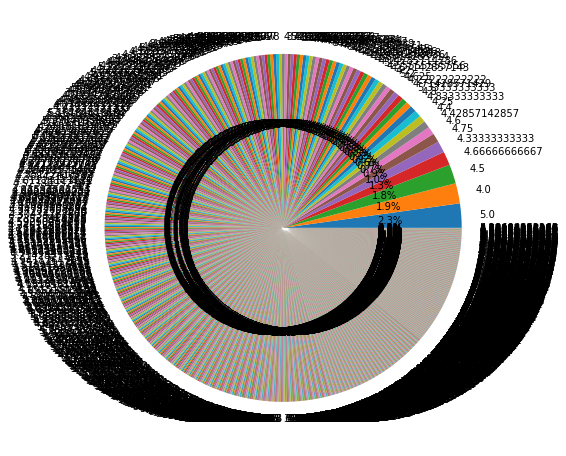

In [78]:
explore[explore.author=='Хауърд']['average_word_lenght'].value_counts().plot.pie(figsize=(8, 8), autopct='%1.1f%%');



In [86]:
edgar_data = explore[explore.author=='Едгар']
howard_data = explore[explore.author=='Хауърд']
marry_data = explore[explore.author=='Мери']

howard_data.describe()

,punctuation,words,unique_words,symbols,unique_symbols,capital_letters,only_capital_letter_words,average_word_lenght
count,5635.000000,5635.000000,5635.000000,5635.000000,5635.000000,5635.000000,5635.000000,5635.000000
mean,3.206921,27.799645,24.437977,155.843478,25.539485,2.440639,0.500266,4.625193
std,2.108637,14.123252,11.053739,82.020647,3.573260,2.301814,0.852313,0.554917
min,1.000000,4.000000,3.000000,21.000000,6.000000,0.000000,0.000000,2.222222
25%,2.000000,18.000000,17.000000,98.000000,24.000000,1.000000,0.000000,4.258065
50%,3.000000,26.000000,23.000000,142.000000,26.000000,2.000000,0.000000,4.600000
75%,4.000000,35.000000,30.000000,196.500000,27.000000,3.000000,1.000000,4.961538
max,28.000000,147.000000,102.000000,900.000000,49.000000,54.000000,10.000000,7.833333


In [87]:
edgar_data.describe()

,punctuation,words,unique_words,symbols,unique_symbols,capital_letters,only_capital_letter_words,average_word_lenght
count,7900.000000,7900.000000,7900.000000,7900.000000,7900.000000,7900.000000,7900.000000,7900.000000
mean,4.096329,25.442405,21.894937,142.225949,24.291519,2.211266,0.553291,4.644952
std,3.573788,18.567706,13.727397,105.751334,4.242128,2.308590,0.892966,0.631340
min,1.000000,2.000000,2.000000,21.000000,10.000000,0.000000,0.000000,2.000000
25%,2.000000,12.000000,12.000000,68.000000,22.000000,1.000000,0.000000,4.250000
50%,3.000000,21.000000,19.000000,115.000000,25.000000,1.000000,0.000000,4.600000
75%,5.000000,33.000000,29.000000,186.000000,27.000000,3.000000,1.000000,5.000000
max,71.000000,267.000000,155.000000,1533.000000,47.000000,49.000000,15.000000,11.000000


In [88]:
marry_data.describe()

,punctuation,words,unique_words,symbols,unique_symbols,capital_letters,only_capital_letter_words,average_word_lenght
count,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000
mean,3.833719,27.417273,23.544672,151.659828,24.829749,2.197220,0.751489,4.598182
std,2.840625,23.134440,14.925835,126.305008,3.764713,2.038798,1.203636,0.561558
min,1.000000,2.000000,2.000000,21.000000,11.000000,0.000000,0.000000,2.666667
25%,2.000000,15.000000,14.000000,84.000000,23.000000,1.000000,0.000000,4.250000
50%,3.000000,23.000000,21.000000,130.000000,25.000000,2.000000,0.000000,4.560791
75%,5.000000,34.000000,30.000000,192.000000,27.000000,3.000000,1.000000,4.907156
max,59.000000,861.000000,429.000000,4663.000000,42.000000,46.000000,27.000000,10.500000


In [133]:
pipeline = Pipeline([
    ('features', CountVectorizer(ngram_range=(1,2))),
])
pipeline.fit(howard_data.text, howard_data.author)
count_vectorizer = pipeline.steps[0][1]
howard_bigrams = list(count_vectorizer.vocabulary_.items())[:15]

In [134]:
pipeline = Pipeline([
    ('features', CountVectorizer(ngram_range=(1,2))),
])
pipeline.fit(edgar_data.text, edgar_data.author)
count_vectorizer = pipeline.steps[0][1]
edgar_bigrams = list(count_vectorizer.vocabulary_.items())[:15]

In [143]:
pipeline = Pipeline([
    ('features', CountVectorizer(ngram_range=(3,3))),
])
pipeline.fit(marry_data.text, marry_data.author)
count_vectorizer = pipeline.steps[0][1]
marry_bigrams = list(count_vectorizer.vocabulary_.items())[:50]

In [146]:
marry_bigrams

[('waldman expressed the', 120016),
 ('written with elegance', 130528),
 ('by my fire', 18646),
 ('and take shelter', 7749),
 ('heat and that', 45298),
 ('that wander near', 100443),
 ('my unfortunate and', 68371),
 ('voice wherewith to', 119881),
 ('and apparently firm', 4231),
 ('the church yard', 101479),
 ('in the only', 53008),
 ('nor felt what', 70327),
 ('the lifeless thing', 104070),
 ('almost dead with', 2721),
 ('were then transformed', 123892),
 ('to myself all', 114127),
 ('for my powers', 36387),
 ('what sea is', 124216),
 ('of little worth', 74197),
 ('fire still glimmers', 35169),
 ('gathered round me', 39126),
 ('proportions she was', 84354),
 ('the glory of', 103128),
 ('his light curls', 48609),
 ('but being surrounded', 17372),
 ('and of gentle', 6762),
 ('about to revive', 162),
 ('half closed eyes', 42181),
 ('only was happiness', 78715),
 ('have been miserably', 43045),
 ('must travel in', 66416),
 ('my unusual spirits', 68384),
 ('night fell when', 69694),
 ('tal

In [151]:
explore.head()

,text,author,punctuation,words,unique_words,symbols,unique_symbols,capital_letters,only_capital_letter_words,average_word_lenght
id,,,,,,,,,,
id26305,"This process, however, afforded me no means of...",Едгар,7,41,35,231,28,3,2,4.658537
id17569,It never once occurred to me that the fumbling...,Хауърд,1,14,14,71,22,1,0,4.142857
id11008,"In his left hand was a gold snuff box, from wh...",Едгар,5,36,32,200,26,1,0,4.583333
id27763,How lovely is spring As we looked from Windsor...,Мери,4,34,32,206,30,4,0,5.088235
id12958,"Finding nothing else, not even gold, the Super...",Хауърд,4,27,25,174,27,2,0,5.481481


In [196]:
from sklearn.naive_bayes import MultinomialNB

pipeline = Pipeline([
    ('features', TfidfVectorizer(ngram_range=(1, 2), min_df=2,
                                 max_df=0.8, lowercase=False)),
    ('clf', MultinomialNB(alpha=0.01))
])
vectorizer = TfidfVectorizer(ngram_range=(1, 2), min_df=2,
                             max_df=0.8, lowercase=False)
explore_copy = vectorizer.fit_transform(explore.text)
multinom = MultinomialNB(alpha=0.01)
multinom.fit(explore_copy, explore.author)
# pipeline = pipeline.fivt(explore.text, explore.author)
cross_val_score(multinom, explore.text, explore.author, cv=3, n_jobs=3)

JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
/usr/lib/python3.5/runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    179         sys.exit(msg)
    180     main_globals = sys.modules["__main__"].__dict__
    181     if alter_argv:
    182         sys.argv[0] = mod_spec.origin
    183     return _run_code(code, main_globals, None,
--> 184                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.5/site-packages/ipykernel_launcher.py')
    185 
    186 def run_module(mod_name, init_globals=None,
    187                run_name=None, alter_sys=False):
    188     """Execute a module's code without importing it

...........................................................................
/usr/lib/python3.5/runpy.py in _run_code(code=<code object <module> at 0x7f299ad7cd20, file "/...3.5/site-packages/ipykernel_launcher.py", line 5>, run_globals={'__builtins__': <module 'builtins' (built-in)>, '__cached__': '/home/ivo/Code/virtual-environments/machine-lear...ges/__pycache__/ipykernel_launcher.cpython-35.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/home/ivo/Code/virtual-environments/machine-lear...lib/python3.5/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.5/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/home/ivo/Co.../python3.5/site-packages/ipykernel/kernelapp.py'>, 'sys': <module 'sys' (built-in)>}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.5/site-packages/ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x7f299ad7cd20, file "/...3.5/site-packages/ipykernel_launcher.py", line 5>
        run_globals = {'__builtins__': <module 'builtins' (built-in)>, '__cached__': '/home/ivo/Code/virtual-environments/machine-lear...ges/__pycache__/ipykernel_launcher.cpython-35.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/home/ivo/Code/virtual-environments/machine-lear...lib/python3.5/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.5/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/home/ivo/Co.../python3.5/site-packages/ipykernel/kernelapp.py'>, 'sys': <module 'sys' (built-in)>}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
/home/ivo/Code/virtual-environments/machine-learning/lib/python3.5/site-packages/ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
/home/ivo/Code/virtual-environments/machine-learning/lib/python3.5/site-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
/home/ivo/Code/virtual-environments/machine-learning/lib/python3.5/site-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    472             return self.subapp.start()
    473         if self.poller is not None:
    474             self.poller.start()
    475         self.kernel.start()
    476         try:
--> 477             ioloop.IOLoop.instance().start()
    478         except KeyboardInterrupt:
    479             pass
    480 
    481 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/home/ivo/Code/virtual-environments/machine-learning/lib/python3.5/site-packages/zmq/eventloop/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    172             )
    173         return loop
    174     
    175     def start(self):
    176         try:
--> 177             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    178         except ZMQError as e:
    179             if e.errno == ETERM:
    180                 # quietly return on ETERM
    181                 pass

...........................................................................
/home/ivo/Code/virtual-environments/machine-learning/lib/python3.5/site-packages/tornado/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    883                 self._events.update(event_pairs)
    884                 while self._events:
    885                     fd, events = self._events.popitem()
    886                     try:
    887                         fd_obj, handler_func = self._handlers[fd]
--> 888                         handler_func(fd_obj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    889                     except (OSError, IOError) as e:
    890                         if errno_from_exception(e) == errno.EPIPE:
    891                             # Happens when the client closes the connection
    892                             pass

...........................................................................
/home/ivo/Code/virtual-environments/machine-learning/lib/python3.5/site-packages/tornado/stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
/home/ivo/Code/virtual-environments/machine-learning/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    435             # dispatch events:
    436             if events & IOLoop.ERROR:
    437                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    438                 return
    439             if events & IOLoop.READ:
--> 440                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    441                 if not self.socket:
    442                     return
    443             if events & IOLoop.WRITE:
    444                 self._handle_send()

...........................................................................
/home/ivo/Code/virtual-environments/machine-learning/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    467                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    468         else:
    469             if self._recv_callback:
    470                 callback = self._recv_callback
    471                 # self._recv_callback = None
--> 472                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    473                 
    474         # self.update_state()
    475         
    476 

...........................................................................
/home/ivo/Code/virtual-environments/machine-learning/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    409         close our socket."""
    410         try:
    411             # Use a NullContext to ensure that all StackContexts are run
    412             # inside our blanket exception handler rather than outside.
    413             with stack_context.NullContext():
--> 414                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    415         except:
    416             gen_log.error("Uncaught exception, closing connection.",
    417                           exc_info=True)
    418             # Close the socket on an uncaught exception from a user callback

...........................................................................
/home/ivo/Code/virtual-environments/machine-learning/lib/python3.5/site-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
/home/ivo/Code/virtual-environments/machine-learning/lib/python3.5/site-packages/ipykernel/kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
/home/ivo/Code/virtual-environments/machine-learning/lib/python3.5/site-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': 'from sklearn.naive_bayes import MultinomialNB\n\np...om, explore.text, explore.author, cv=3, n_jobs=3)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2017, 11, 26, 18, 12, 59, 925918, tzinfo=tzutc()), 'msg_id': '22D362D43DB443FE8A61D781533A9FCA', 'msg_type': 'execute_request', 'session': '9B036B5C5533410388E19BDC57520C7A', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '22D362D43DB443FE8A61D781533A9FCA', 'msg_type': 'execute_request', 'parent_header': {}})
    230             self.log.warn("Unknown message type: %r", msg_type)
    231         else:
    232             self.log.debug("%s: %s", msg_type, msg)
    233             self.pre_handler_hook()
    234             try:
--> 235                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'9B036B5C5533410388E19BDC57520C7A']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': 'from sklearn.naive_bayes import MultinomialNB\n\np...om, explore.text, explore.author, cv=3, n_jobs=3)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2017, 11, 26, 18, 12, 59, 925918, tzinfo=tzutc()), 'msg_id': '22D362D43DB443FE8A61D781533A9FCA', 'msg_type': 'execute_request', 'session': '9B036B5C5533410388E19BDC57520C7A', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '22D362D43DB443FE8A61D781533A9FCA', 'msg_type': 'execute_request', 'parent_header': {}}
    236             except Exception:
    237                 self.log.error("Exception in message handler:", exc_info=True)
    238             finally:
    239                 self.post_handler_hook()

...........................................................................
/home/ivo/Code/virtual-environments/machine-learning/lib/python3.5/site-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'9B036B5C5533410388E19BDC57520C7A'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': 'from sklearn.naive_bayes import MultinomialNB\n\np...om, explore.text, explore.author, cv=3, n_jobs=3)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2017, 11, 26, 18, 12, 59, 925918, tzinfo=tzutc()), 'msg_id': '22D362D43DB443FE8A61D781533A9FCA', 'msg_type': 'execute_request', 'session': '9B036B5C5533410388E19BDC57520C7A', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '22D362D43DB443FE8A61D781533A9FCA', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
/home/ivo/Code/virtual-environments/machine-learning/lib/python3.5/site-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='from sklearn.naive_bayes import MultinomialNB\n\np...om, explore.text, explore.author, cv=3, n_jobs=3)', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    191 
    192         self._forward_input(allow_stdin)
    193 
    194         reply_content = {}
    195         try:
--> 196             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = 'from sklearn.naive_bayes import MultinomialNB\n\np...om, explore.text, explore.author, cv=3, n_jobs=3)'
        store_history = True
        silent = False
    197         finally:
    198             self._restore_input()
    199 
    200         if res.error_before_exec is not None:

...........................................................................
/home/ivo/Code/virtual-environments/machine-learning/lib/python3.5/site-packages/ipykernel/zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('from sklearn.naive_bayes import MultinomialNB\n\np...om, explore.text, explore.author, cv=3, n_jobs=3)',), **kwargs={'silent': False, 'store_history': True})
    528             )
    529         self.payload_manager.write_payload(payload)
    530 
    531     def run_cell(self, *args, **kwargs):
    532         self._last_traceback = None
--> 533         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('from sklearn.naive_bayes import MultinomialNB\n\np...om, explore.text, explore.author, cv=3, n_jobs=3)',)
        kwargs = {'silent': False, 'store_history': True}
    534 
    535     def _showtraceback(self, etype, evalue, stb):
    536         # try to preserve ordering of tracebacks and print statements
    537         sys.stdout.flush()

...........................................................................
/home/ivo/Code/virtual-environments/machine-learning/lib/python3.5/site-packages/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='from sklearn.naive_bayes import MultinomialNB\n\np...om, explore.text, explore.author, cv=3, n_jobs=3)', store_history=True, silent=False, shell_futures=True)
   2723                 self.displayhook.exec_result = result
   2724 
   2725                 # Execute the user code
   2726                 interactivity = "none" if silent else self.ast_node_interactivity
   2727                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2728                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2729                 
   2730                 self.last_execution_succeeded = not has_raised
   2731                 self.last_execution_result = result
   2732 

...........................................................................
/home/ivo/Code/virtual-environments/machine-learning/lib/python3.5/site-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.ImportFrom object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Expr object>, <_ast.Expr object>], cell_name='<ipython-input-196-e9e8d8bcab6b>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 7f2959037a58, executi..._before_exec=None error_in_exec=None result=None>)
   2851                     return True
   2852 
   2853             for i, node in enumerate(to_run_interactive):
   2854                 mod = ast.Interactive([node])
   2855                 code = compiler(mod, cell_name, "single")
-> 2856                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x7f29526764b0, file "<ipython-input-196-e9e8d8bcab6b>", line 14>
        result = <ExecutionResult object at 7f2959037a58, executi..._before_exec=None error_in_exec=None result=None>
   2857                     return True
   2858 
   2859             # Flush softspace
   2860             if softspace(sys.stdout, 0):

...........................................................................
/home/ivo/Code/virtual-environments/machine-learning/lib/python3.5/site-packages/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x7f29526764b0, file "<ipython-input-196-e9e8d8bcab6b>", line 14>, result=<ExecutionResult object at 7f2959037a58, executi..._before_exec=None error_in_exec=None result=None>)
   2905         outflag = True  # happens in more places, so it's easier as default
   2906         try:
   2907             try:
   2908                 self.hooks.pre_run_code_hook()
   2909                 #rprint('Running code', repr(code_obj)) # dbg
-> 2910                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x7f29526764b0, file "<ipython-input-196-e9e8d8bcab6b>", line 14>
        self.user_global_ns = {'CountVectorizer': <class 'sklearn.feature_extraction.text.CountVectorizer'>, 'HashingVectorizer': <class 'sklearn.feature_extraction.text.HashingVectorizer'>, 'Image': <module 'PIL.Image' from '/home/ivo/Code/virtual...arning/lib/python3.5/site-packages/PIL/Image.py'>, 'In': ['', 'import pandas as pd\n\ntrain = pd.read_csv("data/t...pe)\nprint(set(train.columns) - set(test.columns))', 'train.head()', "import matplotlib.pyplot as plt\nimport seaborn a...EAP', 'HPL', 'MWS'], ['Едгар', 'Хауърд', 'Мери'])", "sns.countplot(data=train, x='author')", "all_words = train['text'].str.split(expand=True).unstack().value_counts()\nall_words.head(15)", 'all_words = train[\'text\'].str.split(expand=True)...nts()\nprint("Most used words")\nall_words.head(15)', 'all_words.tail(15)', 'all_words.tail(15)', 'print("Least used words: ")\nall_words.tail(15)', 'eap = train[train.author=="Едгар"].text.values\nh...ues\nmws = train[train.author=="Мери"].text.values', "from wordcloud import WordCloud, STOPWORDS\nfrom ...andom_state=17), alpha=0.98)\n    plt.axis('off');", "from wordcloud import WordCloud, STOPWORDS\nfrom ...andom_state=17), alpha=0.98)\n    plt.axis('off');", 'plot_wordcloud_mask(hpl, "data/spooky-authors/hpl.png")', 'plot_wordcloud_mask(hpl, "data/hpl.png")', 'plot_wordcloud_mask(hpl)', "plot_wordcloud_mask(hpl, 'data/')", "plot_wordcloud_mask(hpl, 'data/hpl.png')", "plot_wordcloud_mask(hpl, 'data/hpl.png')", 'from sklearn.pipeline import Pipeline\nfrom sklea...om sklearn.model_selection import cross_val_score', ...], 'LinearSVC': <class 'sklearn.svm.classes.LinearSVC'>, 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'MultinomialNB': <class 'sklearn.naive_bayes.MultinomialNB'>, 'Out': {2:                                                 ...nothing else, not even gold, the Super...  Хауърд, 4: <matplotlib.axes._subplots.AxesSubplot object>, 5: the     33296
of      20851
and     17059
to    ...    3802
as       3528
he       3422
dtype: int64, 6: the     33296
of      20851
and     17059
to    ...    3802
as       3528
he       3422
dtype: int64, 7: disenfranchised    1
precipices;        1
symmet...ing,          1
L's                1
dtype: int64, 8: disenfranchised    1
precipices;        1
symmet...ing,          1
L's                1
dtype: int64, 9: disenfranchised    1
precipices;        1
symmet...ing,          1
L's                1
dtype: int64, 20: array([ 0.78783701,  0.79635305,  0.79509579]), 21: CountVectorizer(analyzer='word', binary=False, d...\w+\\b',
        tokenizer=None, vocabulary=None), 22: [('particulars', 15803), ('orange', 15305), ('soundless', 20539), ('reconsider', 17998), ('industry', 11459), ('avatar', 1606), ('squares', 20788), ('real', 17869), ('frequented', 9155), ('derelict', 5823), ('forget', 8998), ('definiteness', 5606), ('hysterical', 10922), ('sorts', 20522), ('obligations', 15028)], ...}, 'Pipeline': <class 'sklearn.pipeline.Pipeline'>, 'RandomForestClassifier': <class 'sklearn.ensemble.forest.RandomForestClassifier'>, ...}
        self.user_ns = {'CountVectorizer': <class 'sklearn.feature_extraction.text.CountVectorizer'>, 'HashingVectorizer': <class 'sklearn.feature_extraction.text.HashingVectorizer'>, 'Image': <module 'PIL.Image' from '/home/ivo/Code/virtual...arning/lib/python3.5/site-packages/PIL/Image.py'>, 'In': ['', 'import pandas as pd\n\ntrain = pd.read_csv("data/t...pe)\nprint(set(train.columns) - set(test.columns))', 'train.head()', "import matplotlib.pyplot as plt\nimport seaborn a...EAP', 'HPL', 'MWS'], ['Едгар', 'Хауърд', 'Мери'])", "sns.countplot(data=train, x='author')", "all_words = train['text'].str.split(expand=True).unstack().value_counts()\nall_words.head(15)", 'all_words = train[\'text\'].str.split(expand=True)...nts()\nprint("Most used words")\nall_words.head(15)', 'all_words.tail(15)', 'all_words.tail(15)', 'print("Least used words: ")\nall_words.tail(15)', 'eap = train[train.author=="Едгар"].text.values\nh...ues\nmws = train[train.author=="Мери"].text.values', "from wordcloud import WordCloud, STOPWORDS\nfrom ...andom_state=17), alpha=0.98)\n    plt.axis('off');", "from wordcloud import WordCloud, STOPWORDS\nfrom ...andom_state=17), alpha=0.98)\n    plt.axis('off');", 'plot_wordcloud_mask(hpl, "data/spooky-authors/hpl.png")', 'plot_wordcloud_mask(hpl, "data/hpl.png")', 'plot_wordcloud_mask(hpl)', "plot_wordcloud_mask(hpl, 'data/')", "plot_wordcloud_mask(hpl, 'data/hpl.png')", "plot_wordcloud_mask(hpl, 'data/hpl.png')", 'from sklearn.pipeline import Pipeline\nfrom sklea...om sklearn.model_selection import cross_val_score', ...], 'LinearSVC': <class 'sklearn.svm.classes.LinearSVC'>, 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'MultinomialNB': <class 'sklearn.naive_bayes.MultinomialNB'>, 'Out': {2:                                                 ...nothing else, not even gold, the Super...  Хауърд, 4: <matplotlib.axes._subplots.AxesSubplot object>, 5: the     33296
of      20851
and     17059
to    ...    3802
as       3528
he       3422
dtype: int64, 6: the     33296
of      20851
and     17059
to    ...    3802
as       3528
he       3422
dtype: int64, 7: disenfranchised    1
precipices;        1
symmet...ing,          1
L's                1
dtype: int64, 8: disenfranchised    1
precipices;        1
symmet...ing,          1
L's                1
dtype: int64, 9: disenfranchised    1
precipices;        1
symmet...ing,          1
L's                1
dtype: int64, 20: array([ 0.78783701,  0.79635305,  0.79509579]), 21: CountVectorizer(analyzer='word', binary=False, d...\w+\\b',
        tokenizer=None, vocabulary=None), 22: [('particulars', 15803), ('orange', 15305), ('soundless', 20539), ('reconsider', 17998), ('industry', 11459), ('avatar', 1606), ('squares', 20788), ('real', 17869), ('frequented', 9155), ('derelict', 5823), ('forget', 8998), ('definiteness', 5606), ('hysterical', 10922), ('sorts', 20522), ('obligations', 15028)], ...}, 'Pipeline': <class 'sklearn.pipeline.Pipeline'>, 'RandomForestClassifier': <class 'sklearn.ensemble.forest.RandomForestClassifier'>, ...}
   2911             finally:
   2912                 # Reset our crash handler in place
   2913                 sys.excepthook = old_excepthook
   2914         except SystemExit as e:

...........................................................................
/home/ivo/Code/FMI/university-courses/machine-learning/spooky-author-identification/<ipython-input-196-e9e8d8bcab6b> in <module>()
      9                              max_df=0.8, lowercase=False)
     10 explore_copy = vectorizer.fit_transform(explore.text)
     11 multinom = MultinomialNB(alpha=0.01)
     12 multinom.fit(explore_copy, explore.author)
     13 # pipeline = pipeline.fivt(explore.text, explore.author)
---> 14 cross_val_score(multinom, explore.text, explore.author, cv=3, n_jobs=3)

...........................................................................
/home/ivo/Code/virtual-environments/machine-learning/lib/python3.5/site-packages/sklearn/model_selection/_validation.py in cross_val_score(estimator=MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True), X=id
id26305    This process, however, afforded me...d it ...
Name: text, Length: 19579, dtype: object, y=id
id26305     Едгар
id17569    Хауърд
id11008  ...Хауърд
Name: author, Length: 19579, dtype: object, groups=None, scoring=None, cv=3, n_jobs=3, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')
    316     cv_results = cross_validate(estimator=estimator, X=X, y=y, groups=groups,
    317                                 scoring={'score': scorer}, cv=cv,
    318                                 return_train_score=False,
    319                                 n_jobs=n_jobs, verbose=verbose,
    320                                 fit_params=fit_params,
--> 321                                 pre_dispatch=pre_dispatch)
        pre_dispatch = '2*n_jobs'
    322     return cv_results['test_score']
    323 
    324 
    325 def _fit_and_score(estimator, X, y, scorer, train, test, verbose,

...........................................................................
/home/ivo/Code/virtual-environments/machine-learning/lib/python3.5/site-packages/sklearn/model_selection/_validation.py in cross_validate(estimator=MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True), X=id
id26305    This process, however, afforded me...d it ...
Name: text, Length: 19579, dtype: object, y=id
id26305     Едгар
id17569    Хауърд
id11008  ...Хауърд
Name: author, Length: 19579, dtype: object, groups=None, scoring={'score': <function _passthrough_scorer>}, cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False), n_jobs=3, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', return_train_score=False)
    190     scores = parallel(
    191         delayed(_fit_and_score)(
    192             clone(estimator), X, y, scorers, train, test, verbose, None,
    193             fit_params, return_train_score=return_train_score,
    194             return_times=True)
--> 195         for train, test in cv.split(X, y, groups))
        cv.split = <bound method StratifiedKFold.split of Stratifie...ld(n_splits=3, random_state=None, shuffle=False)>
        X = id
id26305    This process, however, afforded me...d it ...
Name: text, Length: 19579, dtype: object
        y = id
id26305     Едгар
id17569    Хауърд
id11008  ...Хауърд
Name: author, Length: 19579, dtype: object
        groups = None
    196 
    197     if return_train_score:
    198         train_scores, test_scores, fit_times, score_times = zip(*scores)
    199         train_scores = _aggregate_score_dicts(train_scores)

...........................................................................
/home/ivo/Code/virtual-environments/machine-learning/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=3), iterable=<generator object cross_validate.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=3)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Sun Nov 26 20:13:02 2017
PID: 24284Python 3.5.2: /home/ivo/Code/virtual-environments/machine-learning/bin/python3.5
...........................................................................
/home/ivo/Code/virtual-environments/machine-learning/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True), id
id26305    This process, however, afforded me...d it ...
Name: text, Length: 19579, dtype: object, id
id26305     Едгар
id17569    Хауърд
id11008  ...Хауърд
Name: author, Length: 19579, dtype: object, {'score': <function _passthrough_scorer>}, array([ 6475,  6476,  6478, ..., 19576, 19577, 19578]), array([   0,    1,    2, ..., 6604, 6605, 6606]), 0, None, None), {'return_times': True, 'return_train_score': False})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/home/ivo/Code/virtual-environments/machine-learning/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True), id
id26305    This process, however, afforded me...d it ...
Name: text, Length: 19579, dtype: object, id
id26305     Едгар
id17569    Хауърд
id11008  ...Хауърд
Name: author, Length: 19579, dtype: object, {'score': <function _passthrough_scorer>}, array([ 6475,  6476,  6478, ..., 19576, 19577, 19578]), array([   0,    1,    2, ..., 6604, 6605, 6606]), 0, None, None)
        kwargs = {'return_times': True, 'return_train_score': False}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/home/ivo/Code/virtual-environments/machine-learning/lib/python3.5/site-packages/sklearn/model_selection/_validation.py in _fit_and_score(estimator=MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True), X=id
id26305    This process, however, afforded me...d it ...
Name: text, Length: 19579, dtype: object, y=id
id26305     Едгар
id17569    Хауърд
id11008  ...Хауърд
Name: author, Length: 19579, dtype: object, scorer={'score': <function _passthrough_scorer>}, train=array([ 6475,  6476,  6478, ..., 19576, 19577, 19578]), test=array([   0,    1,    2, ..., 6604, 6605, 6606]), verbose=0, parameters=None, fit_params={}, return_train_score=False, return_parameters=False, return_n_test_samples=False, return_times=True, error_score='raise')
    432 
    433     try:
    434         if y_train is None:
    435             estimator.fit(X_train, **fit_params)
    436         else:
--> 437             estimator.fit(X_train, y_train, **fit_params)
        estimator.fit = <bound method BaseDiscreteNB.fit of MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)>
        X_train = id
id15739    Its close resemblance to the medic...d it ...
Name: text, Length: 13051, dtype: object
        y_train = id
id15739     Едгар
id19588     Едгар
id11059  ...Хауърд
Name: author, Length: 13051, dtype: object
        fit_params = {}
    438 
    439     except Exception as e:
    440         # Note fit time as time until error
    441         fit_time = time.time() - start_time

...........................................................................
/home/ivo/Code/virtual-environments/machine-learning/lib/python3.5/site-packages/sklearn/naive_bayes.py in fit(self=MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True), X=id
id15739    Its close resemblance to the medic...d it ...
Name: text, Length: 13051, dtype: object, y=id
id15739     Едгар
id19588     Едгар
id11059  ...Хауърд
Name: author, Length: 13051, dtype: object, sample_weight=None)
    574         Returns
    575         -------
    576         self : object
    577             Returns self.
    578         """
--> 579         X, y = check_X_y(X, y, 'csr')
        X = id
id15739    Its close resemblance to the medic...d it ...
Name: text, Length: 13051, dtype: object
        y = id
id15739     Едгар
id19588     Едгар
id11059  ...Хауърд
Name: author, Length: 13051, dtype: object
    580         _, n_features = X.shape
    581 
    582         labelbin = LabelBinarizer()
    583         Y = labelbin.fit_transform(y)

...........................................................................
/home/ivo/Code/virtual-environments/machine-learning/lib/python3.5/site-packages/sklearn/utils/validation.py in check_X_y(X=id
id15739    Its close resemblance to the medic...d it ...
Name: text, Length: 13051, dtype: object, y=id
id15739     Едгар
id19588     Едгар
id11059  ...Хауърд
Name: author, Length: 13051, dtype: object, accept_sparse='csr', dtype='numeric', order=None, copy=False, force_all_finite=True, ensure_2d=True, allow_nd=False, multi_output=False, ensure_min_samples=1, ensure_min_features=1, y_numeric=False, warn_on_dtype=False, estimator=None)
    537     y_converted : object
    538         The converted and validated y.
    539     """
    540     X = check_array(X, accept_sparse, dtype, order, copy, force_all_finite,
    541                     ensure_2d, allow_nd, ensure_min_samples,
--> 542                     ensure_min_features, warn_on_dtype, estimator)
        ensure_min_features = 1
        warn_on_dtype = False
        estimator = None
    543     if multi_output:
    544         y = check_array(y, 'csr', force_all_finite=True, ensure_2d=False,
    545                         dtype=None)
    546     else:

...........................................................................
/home/ivo/Code/virtual-environments/machine-learning/lib/python3.5/site-packages/sklearn/utils/validation.py in check_array(array=id
id15739    Its close resemblance to the medic...d it ...
Name: text, Length: 13051, dtype: object, accept_sparse='csr', dtype=<class 'numpy.float64'>, order=None, copy=False, force_all_finite=True, ensure_2d=True, allow_nd=False, ensure_min_samples=1, ensure_min_features=1, warn_on_dtype=False, estimator=None)
    397 
    398     if sp.issparse(array):
    399         array = _ensure_sparse_format(array, accept_sparse, dtype, copy,
    400                                       force_all_finite)
    401     else:
--> 402         array = np.array(array, dtype=dtype, order=order, copy=copy)
        array = id
id15739    Its close resemblance to the medic...d it ...
Name: text, Length: 13051, dtype: object
        dtype = <class 'numpy.float64'>
        order = None
        copy = False
    403 
    404         if ensure_2d:
    405             if array.ndim == 1:
    406                 raise ValueError(

ValueError: could not convert string to float: 'He laid a gnarled claw on my shoulder, and it seemed to me that its shaking was not altogether that of mirth.'
___________________________________________________________________________

In [173]:
pipeline.memory

In [174]:
print(pipeline.predict_proba(test[:10].text))


[[  1.35048736e-02   9.84099382e-01   2.39574433e-03]
 [  9.56490435e-01   1.86160773e-03   4.16479578e-02]
 [  5.02125066e-03   1.81405097e-03   9.93164698e-01]
 [  7.80026971e-01   1.05174165e-03   2.18921288e-01]
 [  5.52830591e-01   7.76716406e-02   3.69497769e-01]
 [  9.36689592e-01   2.95332942e-04   6.30150746e-02]
 [  9.53634752e-01   4.36937890e-03   4.19958690e-02]
 [  4.81490244e-03   9.79569318e-01   1.56157800e-02]
 [  9.94703828e-01   1.07143053e-05   5.28545795e-03]
 [  4.92431648e-01   1.23390572e-01   3.84177780e-01]]


In [176]:
test_predictions = pipeline.predict_proba(test.text)
test_predictions

array([[ 0.01350487,  0.98409938,  0.00239574],
       [ 0.95649043,  0.00186161,  0.04164796],
       [ 0.00502125,  0.00181405,  0.9931647 ],
       ..., 
       [ 0.95589875,  0.02468399,  0.01941727],
       [ 0.07940285,  0.91698906,  0.00360809],
       [ 0.40196145,  0.00211676,  0.59592179]])